<a href="https://colab.research.google.com/github/itspriiyanshu/Assignments_Y24/blob/main/canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np

file="/content/monarch_in_may.jpg"
img=Image.open(file)
img=img.convert('L')
vec=np.array(img)
print(vec)



[[51 51 52 ... 37 37 37]
 [52 52 53 ... 38 38 39]
 [52 51 51 ... 40 40 41]
 ...
 [50 52 56 ... 45 45 46]
 [48 50 52 ... 40 40 40]
 [51 51 51 ... 36 35 35]]


In [ ]:
gblur=np.array([[1,2,1],
               [2,4,2],
               [1,2,1]])
gblur=gblur/np.sum(gblur)
print(gblur)

hi , wi = vec.shape
hf , wf= gblur.shape

pad = hf//2

padded = np.pad(vec, pad_width=pad, mode='constant', constant_values=0)

cvec= np.zeros_like(vec)

for i in range(hi):
    for j in range(wi):
        cvec[i,j]=int(np.sum(padded[i:i+hf,j:j+wf]*gblur))

print(cvec)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[28 38 39 ... 27 28 21]
 [38 51 52 ... 38 38 29]
 [38 51 50 ... 39 40 30]
 ...
 [38 52 56 ... 44 44 33]
 [37 50 53 ... 39 40 30]
 [28 38 38 ... 27 27 20]]


In [ ]:
from math import atan2, pi, sqrt

Sx=np.array([[1 , 0 , -1],
             [2 , 0 , -2],
             [1 , 0 , -1]])
Sy = np.array([[1 , 2 , 1],
               [0 , 0 , 0],
               [-1 , -2 , -1]])
# Sx=Sx/np.sum(Sx)
# Sy=Sy/np.sum(Sy)

G_mag=np.zeros_like(vec, dtype=np.float64)
G_dir=np.zeros_like(vec, dtype=np.float64)

for i in range(1, hi-1):
  for j in range(1,wi-1):
    region = vec[i-1:i+2, j-1:j+2]
    grad_x = np.sum(region * Sx)
    grad_y = np.sum(region * Sy)

    G_mag[i, j] = sqrt(grad_x**2 + grad_y**2)
    G_dir[i, j] = atan2(grad_y, grad_x) * 180 / pi


In [ ]:
    height, width = G_mag.shape
    suppressed_img = np.zeros_like(G_mag)

    for i in range(1, height-1):
        for j in range(1, width-1):
            angle = G_dir[i, j] % 180

            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):  # Horizontal edges
                neighbors = [G_mag[i, j-1], G_mag[i, j+1]]
            elif (22.5 <= angle < 67.5):  # Diagonal 45° edges
                neighbors = [G_mag[i-1, j+1], G_mag[i+1, j-1]]
            elif (67.5 <= angle < 112.5):  # Vertical edges
                neighbors = [G_mag[i-1, j], G_mag[i+1, j]]
            else:  # Diagonal 135° edges
                neighbors = [G_mag[i-1, j-1], G_mag[i+1, j+1]]

            # Compare the G_mag with its neighbors
            if G_mag[i, j] >= max(neighbors):
                suppressed_img[i, j] = G_mag[i, j]
            else:
                suppressed_img[i, j] = 0
    suppressed_img=suppressed_img/np.max(suppressed_img)
    # print(suppressed_img)

In [ ]:
strong_edges = np.zeros_like(G_mag)
weak_edges = np.zeros_like(G_mag)

high_thresh = 0.09 * np.max(G_mag)
low_thresh = 0.03 * np.max(G_mag)
# Apply thresholds
strong_edges[G_mag >= high_thresh] = 255
weak_edges[(G_mag >= low_thresh) & (G_mag < high_thresh)] = 128

In [ ]:
height, width = strong_edges.shape
final_edges = np.copy(strong_edges)

for i in range(1, height-1):
    for j in range(1, width-1):
        if weak_edges[i, j] == 128:
            # If a weak edge is connected to a strong edge, keep it
            if np.any(strong_edges[i-1:i+2, j-1:j+2] == 255):
                final_edges[i, j] = 255
            else:
                final_edges[i, j] = 0

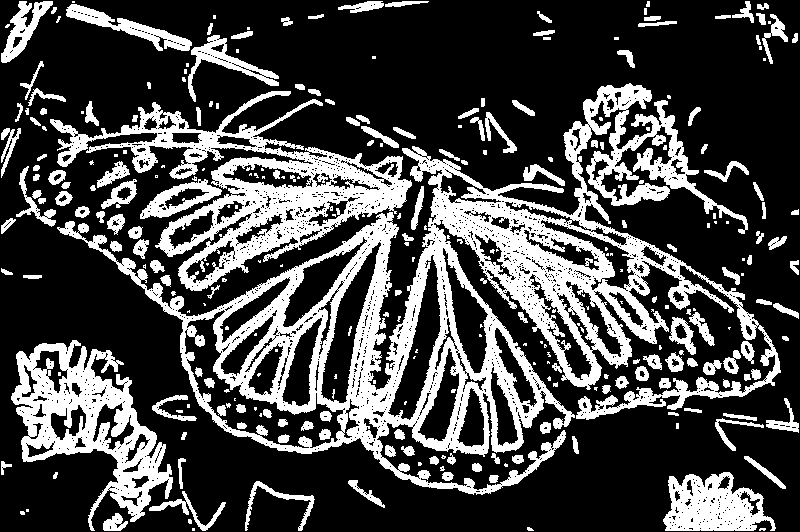

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(final_edges)
